## FIRST ATTEMPT TO CNN

In this framework, I will try to built a first attempt to the neural networ requested by the project, so I try to answer to the first part of the project

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import PIL
from keras.models import Sequential
from keras.layers import Dense
import os
import cv2


from keras.utils import to_categorical #to create dummy variable
from keras.layers import Conv2D,Flatten,Dropout, MaxPooling2D,AveragePooling2D

Using TensorFlow backend.


## PREPROCESSING DEI  DATI 

The most popular and de facto standard library in Python for loading and working with image data is Pillow. Pillow is an updated version of the Python Image Library, or PIL, and supports a range of simple and sophisticated image manipulation functionality.

In [2]:
import import_ipynb
import utils

importing Jupyter notebook from utils.ipynb


In [3]:
# SOME IMPORTANT GLOBAL VARIABLE
base_dir = '../images/'
train_dir=os.path.join(base_dir,'train')
test_dir=os.path.join(base_dir,'test')
direc = '../images/train/'
labels = ["Bedroom","Coast","Forest","HighWay","Industrial","InsideCity","Kitchen","LivingRoom","Mountain","Office","OpenCountry","Store","Street","Suburb","TallBuilding"]
list_categories = ['../images/train/{}'.format(i) for i in os.listdir(train_dir) if i!='.DS_Store']




In [4]:
list_of_images = utils.list_of_path(labels,'../images/train/')
train_data,train_labels= utils.read_and_process_images(list_of_images)




In [5]:
list_of_images_test = utils.list_of_path(labels,'../images/test/')
test_data,test_labels = utils.read_and_process_images(list_of_images_test)

In [6]:
train_data = train_data.reshape(train_data.shape[0],train_data.shape[1],train_data.shape[2],1)
test_data = test_data.reshape(test_data.shape[0],test_data.shape[1],test_data.shape[2],1)

In [8]:
from keras.utils import to_categorical
from keras import optimizers

In [9]:
train_labels_dummy = to_categorical(train_labels,15)
test_labels_dummy = to_categorical(test_labels,15)

## DEFINITION OF THE MODEL 

In [10]:
sgd = optimizers.SGD(momentum=0.9,nesterov=True)

In [11]:
from keras import initializers

In [12]:
norm = initializers.RandomNormal(mean=0.0, stddev=0.01, seed=None)

In [36]:

#adam = optimizers.Adam()
model = Sequential()
#first convolutional layer
model.add(Conv2D(filters=8,kernel_size=3,padding = 'valid',activation='relu',input_shape=(64,64,1)))
model.add(MaxPooling2D(pool_size=2,strides=2))

#secondo convolutional layer
model.add(Conv2D(filters=16,kernel_size=3,strides=2,padding='valid',activation='relu',input_shape=(64,64,1)))
model.add(MaxPooling2D(pool_size=2,strides=2))

#third convolutional layer
model.add(Conv2D(filters=32,kernel_size=3,padding='valid',activation='relu',input_shape=(64,64,1)))
model.add(Flatten())
model.add(Dense(15,activation='relu',kernel_initializer=norm,bias_initializer='zeros'))
model.add(Dense(15,activation='softmax'))

#classification output
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics = ['accuracy'])




In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import History
history = History()
earlyStopping = EarlyStopping(min_delta=0.10,patience = 10)


model.fit(train_data,train_labels_dummy,batch_size=32,epochs=100,validation_split=0.15,shuffle=True,callbacks=[earlyStopping,history])


In [38]:
model.evaluate(test_data,test_labels_dummy)

2985/2985 [==============================] - 1s 292us/step


[2.3705558300018312, 0.33266332745552063]

In [39]:
from sklearn.metrics import confusion_matrix

In [40]:
y_pred = model.predict_classes(test_data)

In [41]:
cm = confusion_matrix(test_labels,y_pred)

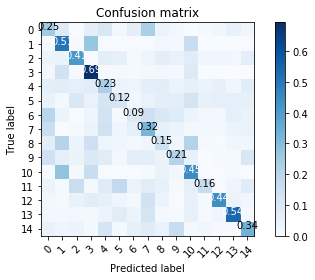

In [42]:
utils.plot_confusion_matrix(cm,['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14'],normalize=True)


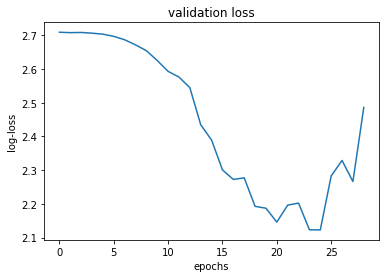

In [43]:
plt.title("validation loss")
plt.xlabel("epochs")
plt.ylabel("log-loss")
plt.plot(history.history['val_loss'])


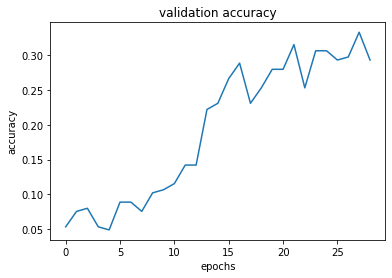

In [45]:

plt.title("validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.plot(history.history['val_accuracy'])


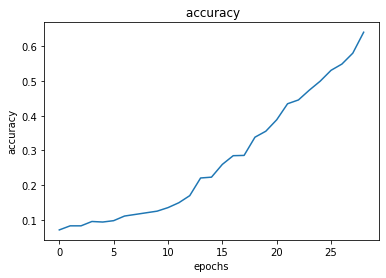

In [46]:
plt.title(" accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.plot(history.history['accuracy'])

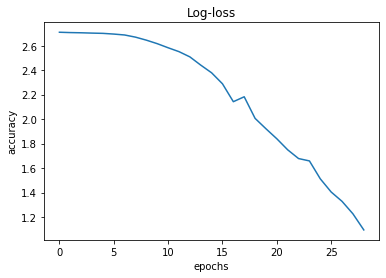

In [48]:
plt.title("Log-loss")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.plot(history.history['loss'])

## FASE 2 --> CERCARE DI MIGLIORARE LA NOSTRA RETE NEURALE 

Il test accuracy ora è di circa il 35%, ma lo vogliamo migliorare in qualche modo

Già con il Dropout la situazione migliora, anche se non di molto

Ora proveremo con il data augmentation, considerando semplicemente le stesse immagini ""specchiate"